In [1]:
import torch
import torchvision
import torch.nn as nn
from tqdm.notebook import tqdm

In [2]:
resnet18 = torchvision.models.resnet18(pretrained=True)
modules = list(resnet18.children())[:-1]
img_encoder = nn.Sequential(*modules)
for p in img_encoder.parameters():
    p.requires_grad = False

# Test pretrained model

In [3]:
img = torch.ones(1, 3, 9,9)
img_encoder.eval()
out = img_encoder(img)
out.size()

[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.


torch.Size([1, 512, 1, 1])

# Test Env

In [2]:
from env import MazeEnv
task = MazeEnv(length=9)
img = task.img()

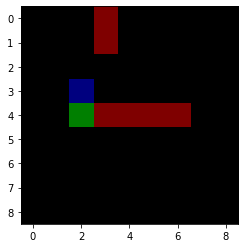

In [3]:
import matplotlib.pyplot as plt
# img = torch.ones(1, 3, 9,9)
# img = img.squeeze(0)
plt.imshow(img.permute(1,2,0))

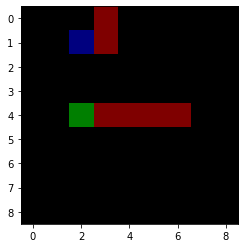

In [5]:
from env import Name
action = Name.up
task.step(action)
plt.imshow(task.img().permute(1,2,0))

# Test model

In [7]:
from model import LSTM
rnn = LSTM(hidden_size=256)


In [3]:
img = torch.ones(1, 3, 9,9)
img_encoder.eval()
feature = img_encoder(img)

[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.


In [5]:
feature = feature.view(1, 1, -1)
feature.size()

torch.Size([1, 1, 512])

In [9]:
action = torch.zeros(1, 1, 4)
logit, mem_state = rnn(feature, action)
logit

tensor([[[ 0.0312, -0.0618,  0.0292, -0.1300]]], grad_fn=<AddBackward0>)